# Lab 3 - 13/10

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.manifold import Isomap
import myfunctions as f

## Ex 1

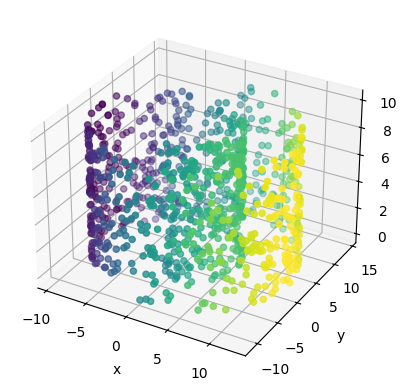

In [2]:
# Generate data
n = 1000
x = f.swiss_roll(n)
k = 5

axes = plt.axes(projection='3d')
axes.scatter3D(x[:,0], x[:,1], x[:,2], c=x[:,0])
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

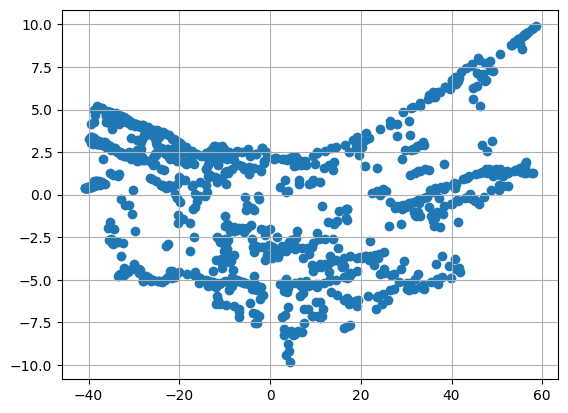

In [3]:
# Apply isomap - 11m 3s
new_data = f.isomap(x, 2, k)

# Plot
plt.scatter(new_data[:,0], new_data[:,1])
plt.grid()
plt.show()

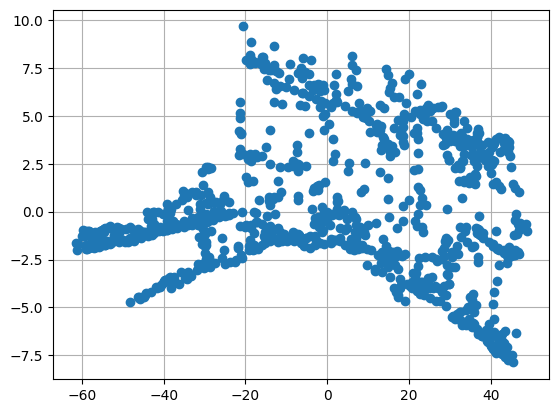

In [4]:
# Generate perturbed data
data = f.swiss_roll_gaussian_noise(n)

# Apply isomap - 11m 3s
new_perturbed_data = f.isomap(data, 2, k)

# Plot
plt.plot(new_perturbed_data[:,0], new_perturbed_data[:,1], 'o')
plt.grid()
plt.show()

## Ex 2

In [5]:
# Creation of train and test set
beans = pd.read_excel('Datasets/Dry_Bean_Dataset.xlsx')
data = beans.loc [:, beans.columns != "Class"]
output = beans.loc[:, "Class"]
x, _, y, _ = model_selection.train_test_split(data, output, train_size= 1000, random_state=12, shuffle = True)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size = 0.8, random_state = 17)

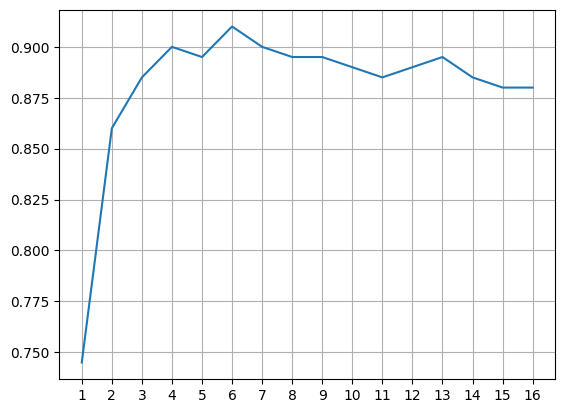

In [6]:
iso = Isomap(n_components = 16, n_neighbors = 10)
x_train = f.normalize_data(x_train)
x_test = f.normalize_data(x_test)
transformed_data = iso.fit_transform(x_train)
new_test = iso.transform(x_test)
score = []

for i in range(1,17):
    model = linear_model.LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(transformed_data[:,0:i], y_train)
    transformed_test = new_test[:,0:i]
    
    prediction = model.predict(transformed_test)
    score.append(model.score(transformed_test, y_test))

xx = np.array([i for i in range(1,17)])
plt.plot(xx,score)
plt.xticks(xx)
plt.grid()
plt.show()

In [7]:
print(f"The highest accuracy is reached using {np.argmax(score)+1} components and it is equal to {np.max(score)}")

The highest accuracy is reached using 6 components and it is equal to 0.91
